In [55]:
#import packages
import os
import pandas as pd
import numpy as np
from numpy import mean, std, cov 
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot

from __future__ import division 
import sys
import scipy
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [61]:
#set paths

path = os.getcwd()
print(path)

/Users/melanieruiz/Library/CloudStorage/GoogleDrive-mruiz@adelphi.edu/My Drive/WTP_data/PCA


In [51]:

print(sys.executable)
!{sys.executable} -m pip install homebrew

/Users/melanieruiz/opt/anaconda3/bin/python


In [62]:
# #load dataset for study 2
# study2 = pd.read_csv(r'WTP_master_study2_4PCA.csv', encoding='utf-8-sig')
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pca_df = pd.DataFrame()

# study2['PCA_PC1'] = pca_df['PC1']
# print(study2)

#import excel file containing data summary

#load dataset for all WTP subs
wtpdata = pd.read_csv(path + r'/WTP_master_ALLdata_4PCA.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
#import excel file containing data summary
wtpdata= wtpdata.reset_index(drop=True)



In [63]:
#extract column of participant ids and drop from dataframe
ids = wtpdata['dem_ID']
wtpdata = wtpdata.drop(['dem_ID'], axis=1)
#store id column in variable called "measures"
measures = wtpdata.columns

In [66]:
#add id column as the index in the dataframe
data = pd.DataFrame(data=wtpdata)
data.index = ids
print(data)

                          AQ  BISBAS_BIS  BISBAS_BASRR  BISBAS_FS  \
dem_ID                                                              
549ea92efdf99b4ffa5fa208  26           0             0          0   
55a43687fdf99b7da1908e0f  16           0             0          0   
55ea70c37480920010aa9982  17           0             0          0   
56259489ed6e5a0005c80fde  37          26            20         11   
566c9284d408ea000519c6d7   5           0             0          0   
56f745653bd969000d170c15  32           0             0          0   
57e972d7c3e5930001447bb1  23           0             0          0   
58060d08b869700001d70b8c  22          16            20         11   
58ab75c4ef58a9000119d16c  20           0             0          0   
5914b7b50a4b9d0001add64f  24           0             0          0   
5a78e410ae9a0b0001a97274  20          19            15          7   
5adbc051f6b58c0001fa3bbe  22          26            18          9   
5af529ca222e4d0001878444  16      

In [67]:
#sample size
sample_size = len(wtpdata)
print(sample_size)

293


In [68]:
#transpose dataframe so that the rows represent measures and columns represent each participant
data = data.transpose()
print(data)

dem_ID                  549ea92efdf99b4ffa5fa208  55a43687fdf99b7da1908e0f  \
AQ                                          26.0                      16.0   
BISBAS_BIS                                   0.0                       0.0   
BISBAS_BASRR                                 0.0                       0.0   
BISBAS_FS                                    0.0                       0.0   
BISBAS_BASD                                  0.0                       0.0   
BRCS                                        14.0                      16.0   
CESD                                        11.0                       0.0   
COVIDexperience_score                       20.0                      17.0   
COVIDimpacts_score                          66.0                      56.0   
COVIDpsychstress_score                       8.0                      18.0   
COVIDthreat_score                           28.0                      22.0   
IRI_FS                                      24.0                

In [69]:
#return 1st five values of dataframe
print(data.head())
#return dimensions of our data matrix: 28 measures by 226 participants
print(data.shape)

dem_ID        549ea92efdf99b4ffa5fa208  55a43687fdf99b7da1908e0f  \
AQ                                26.0                      16.0   
BISBAS_BIS                         0.0                       0.0   
BISBAS_BASRR                       0.0                       0.0   
BISBAS_FS                          0.0                       0.0   
BISBAS_BASD                        0.0                       0.0   

dem_ID        55ea70c37480920010aa9982  56259489ed6e5a0005c80fde  \
AQ                                17.0                      37.0   
BISBAS_BIS                         0.0                      26.0   
BISBAS_BASRR                       0.0                      20.0   
BISBAS_FS                          0.0                      11.0   
BISBAS_BASD                        0.0                      15.0   

dem_ID        566c9284d408ea000519c6d7  56f745653bd969000d170c15  \
AQ                                 5.0                      32.0   
BISBAS_BIS                         0.0        

In [70]:
#STEP 1: before PCA, scale and center the data
#Standardizarion ensures the range of the continous inital variables each equally contributes to the analysis
scaled_data = preprocessing.scale(data.T)
# print(scaled_data)
#alternative function: StandardScaler().fit_transform(data.T)
type(scaled_data)
scaled_df = pd.DataFrame(data= scaled_data)
# print(scaled_df)
scaled_df.insert(0,'id',ids)
print(scaled_df)

                           id         0         1         2         3  \
0    549ea92efdf99b4ffa5fa208  0.726983 -1.109411 -1.143511 -1.088015   
1    55a43687fdf99b7da1908e0f -0.752226 -1.109411 -1.143511 -1.088015   
2    55ea70c37480920010aa9982 -0.604305 -1.109411 -1.143511 -1.088015   
3    56259489ed6e5a0005c80fde  2.354113  1.193448  1.127236  0.802374   
4    566c9284d408ea000519c6d7 -2.379355 -1.109411 -1.143511 -1.088015   
5    56f745653bd969000d170c15  1.614508 -1.109411 -1.143511 -1.088015   
6    57e972d7c3e5930001447bb1  0.283221 -1.109411 -1.143511 -1.088015   
7    58060d08b869700001d70b8c  0.135300  0.307733  1.127236  0.802374   
8    58ab75c4ef58a9000119d16c -0.160542 -1.109411 -1.143511 -1.088015   
9    5914b7b50a4b9d0001add64f  0.431141 -1.109411 -1.143511 -1.088015   
10   5a78e410ae9a0b0001a97274 -0.160542  0.573448  0.559549  0.114960   
11   5adbc051f6b58c0001fa3bbe  0.135300  1.193448  0.900162  0.458667   
12   5af529ca222e4d0001878444 -0.752226  1.370591  

In [71]:
#in sklearn, variation is calculated as:
#(measurements - mean)^2 / number of measurements

In [72]:

#create PCA object
#sklearn uses objects that can be trained using one dataseet and applied to another dataset
pca = PCA()

#call fit method on scaled data, where all PCA math occurs (i.e. calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_data)


#generate coordinates for PCA graph based on loading scores and scaled data
pca_data = pca.transform(scaled_data)
print(pca_data)

[[-8.07624440e-01 -2.37867773e+00 -4.00447414e-01 ... -3.91244543e-01
  -2.29329537e-02 -1.43097047e-15]
 [ 2.49981404e+00 -1.10144927e+00  2.28386335e-01 ... -8.97158811e-02
   1.06938787e-01 -4.91029751e-16]
 [ 3.26533681e+00 -2.39026971e+00 -3.95302008e+00 ...  1.97533980e-01
   7.31941250e-02  1.84846160e-15]
 ...
 [ 2.00711126e+00  1.92062738e+00 -2.89291389e+00 ... -6.27760418e-01
  -1.60889057e-03 -9.44188963e-17]
 [-4.40748558e-01  2.46615207e+00  2.48985933e+00 ... -2.32607480e-02
  -1.45539532e-01 -7.74051784e-16]
 [-1.93317909e-01  1.87402920e+00 -8.66152174e-01 ... -1.24568780e-01
   2.05548115e-01  8.84793179e-16]]


In [73]:
#drawing a graph
#create a screeplot to see how many principal components should go into the final plot


In [74]:
#calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

type(per_var)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [75]:
#now create labels for scree plot, 1 label per principal component; PC1, PC2, etc
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]


In [76]:
percs = pd.DataFrame(per_var)
print(per_var)

[24.  14.3 11.4  7.7  5.9  4.5  4.   3.8  2.9  2.8  2.6  2.5  2.2  1.9
  1.9  1.4  1.3  1.1  1.1  0.7  0.7  0.5  0.4  0.3  0.1  0. ]


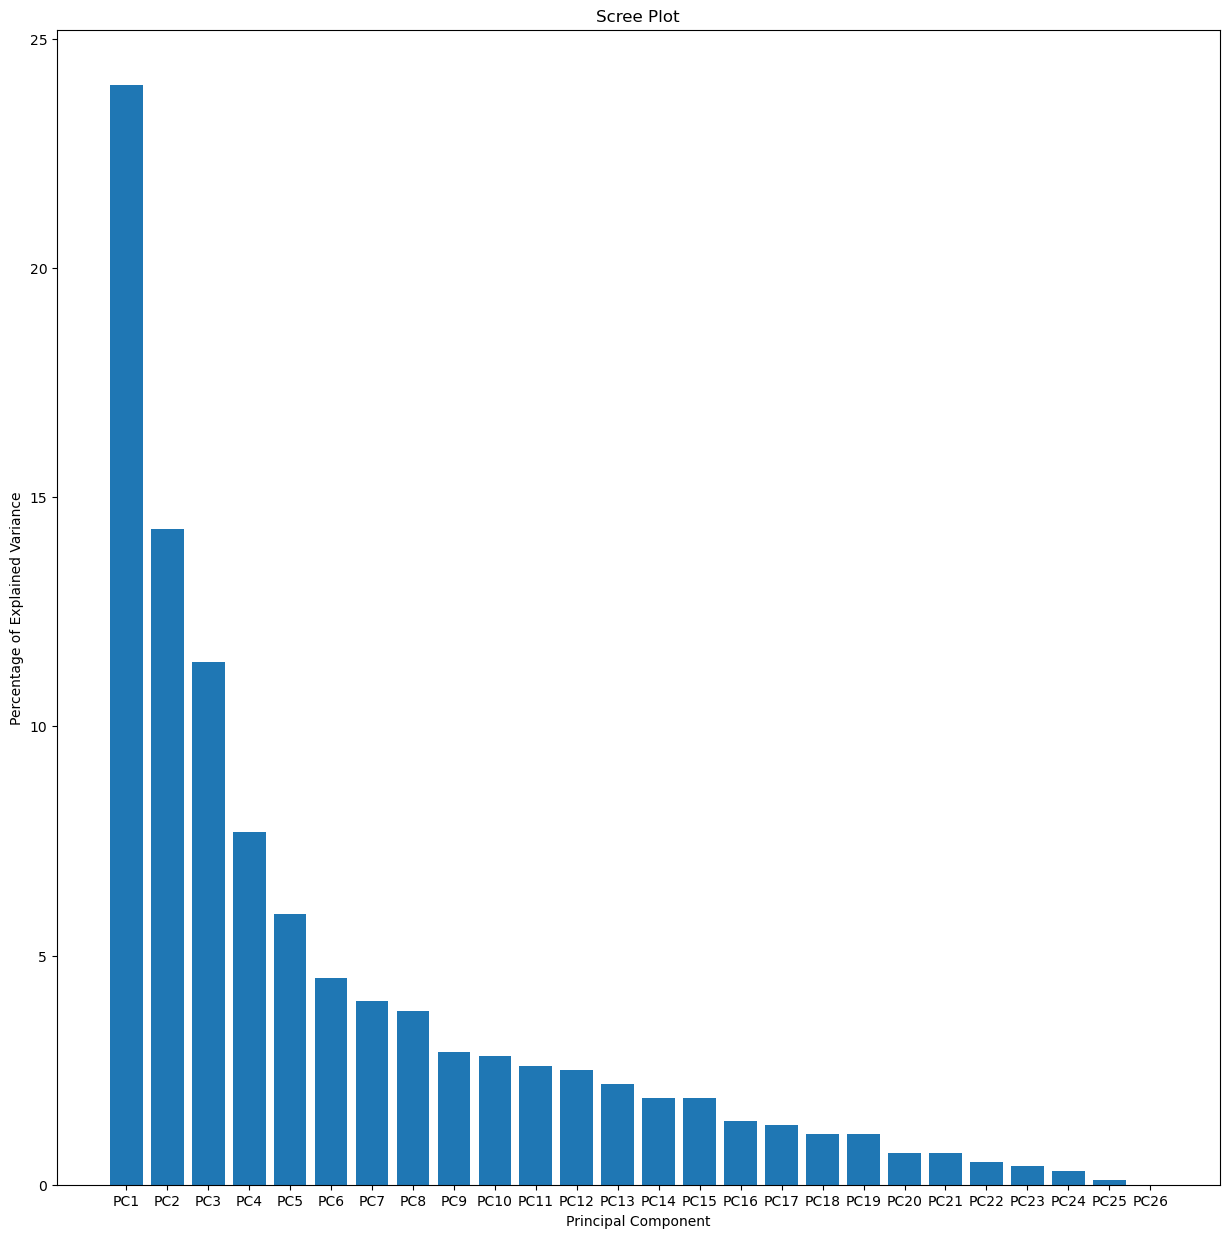

In [77]:
#use matplotlib to create a bar plot
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(per_var)+1), height= per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [78]:
#almost all of the variation is along PC1, so a 2d graph using PC1 and PC2 should do a good job representing the original data

In [79]:
#draw a PCA plot
#first, put the new coordinates created by pca.transform(scaled.data)
#into a matrix where the rows have the participant ids and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=ids,columns=labels)
print(pca_df)
pca_df.to_csv('WTP_PCA_allsubjects.csv')

                               PC1       PC2       PC3       PC4       PC5  \
dem_ID                                                                       
549ea92efdf99b4ffa5fa208 -0.807624 -2.378678 -0.400447 -2.682740 -1.593052   
55a43687fdf99b7da1908e0f  2.499814 -1.101449  0.228386 -0.631988 -2.159255   
55ea70c37480920010aa9982  3.265337 -2.390270 -3.953020  3.168164  1.435277   
56259489ed6e5a0005c80fde -1.000478  1.972937 -0.626390 -1.746304  1.474813   
566c9284d408ea000519c6d7  6.006259 -0.619626  0.490998 -1.152397  1.724335   
56f745653bd969000d170c15 -0.842689 -2.917787 -0.273255  0.752934  1.983061   
57e972d7c3e5930001447bb1 -2.330755 -3.059804 -0.126097 -1.401586 -0.602036   
58060d08b869700001d70b8c  0.572976  1.600636 -0.895331 -0.164160  1.537877   
58ab75c4ef58a9000119d16c  0.484850 -2.401019  0.014914 -2.092139  0.108497   
5914b7b50a4b9d0001add64f  0.221484 -2.997799 -2.655847  1.664373  0.550561   
5a78e410ae9a0b0001a97274  3.391017  1.461241 -1.184609 -0.681760

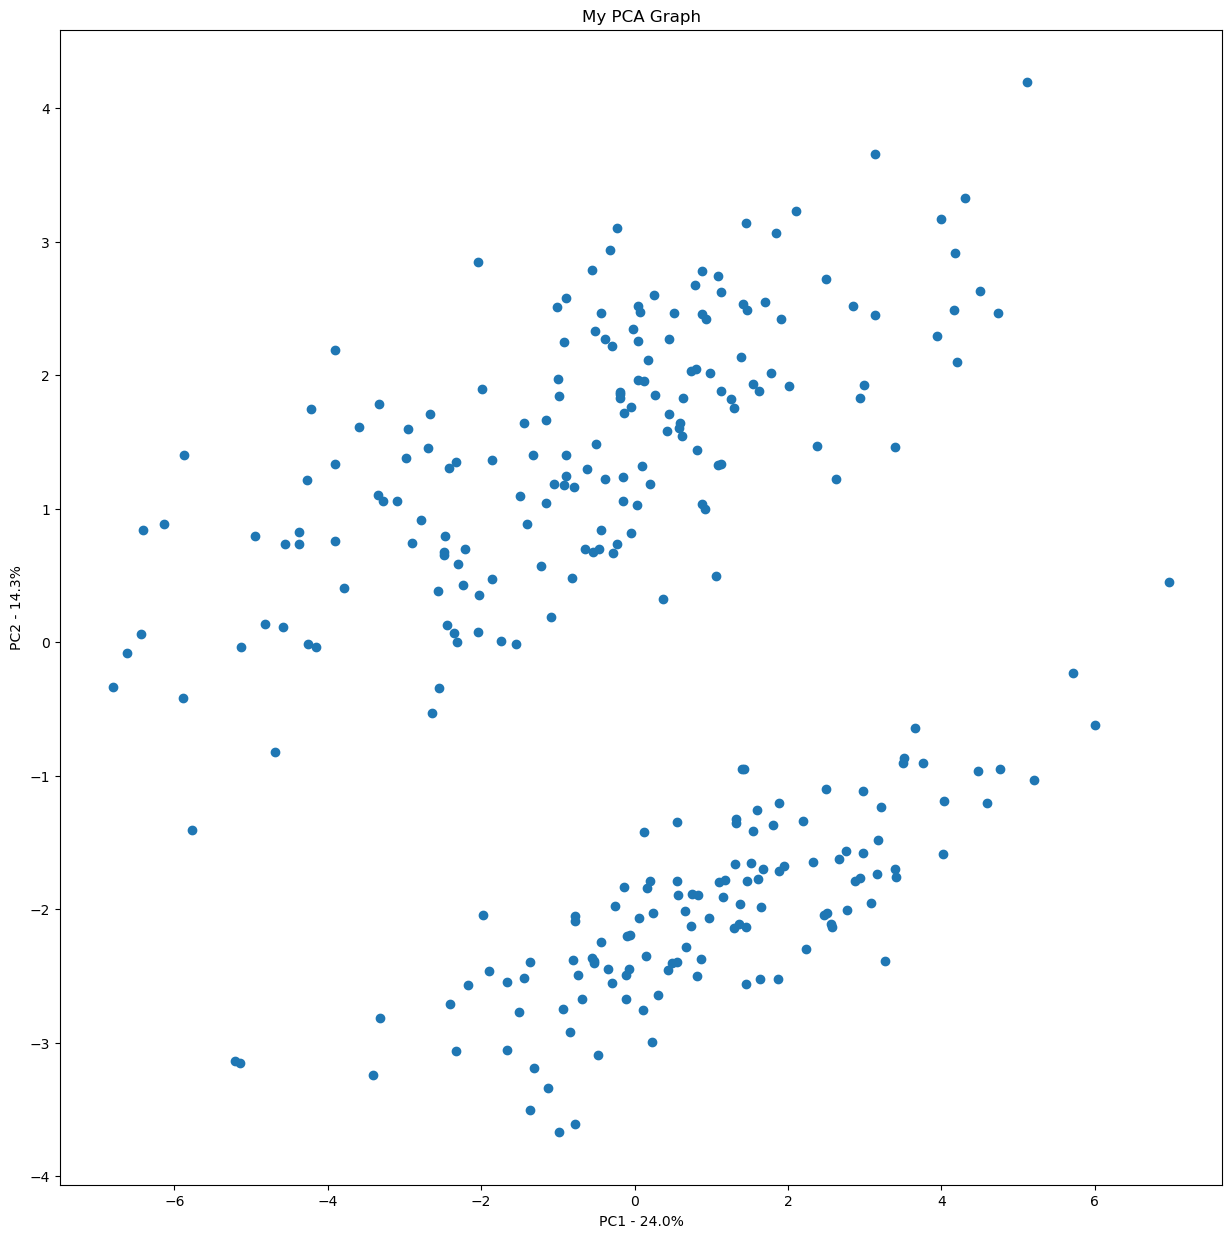

In [80]:
#Visualize the distribution of the samples
#draw a scatter plot
plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#add sample names to graph
# for sample in pca_df.index:
#     plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [81]:
# from pca import pca

# # Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
# model = pca(n_components=0.95)

# # Or reduce the data towards 2 PCs
# model = pca(n_components=2)

# # Fit transform
# results = model.fit_transform(scaled_data)

# # Plot explained variance
# fig, ax = model.plot()

# # Scatter first 2 PCs
# fig, ax = model.scatter()

# # Make biplot with the number of features
# fig, ax = model.biplot(n_feat=4)

In [82]:
#PC1
#The next step in our interpretation is to understand how our variables contribute to each of the principal components, and this is revealed by the loadings.
#look at the loading scores for PC1 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis

#loading scores- can be understood as the weights for each original variable when calculating the principal component

#  Positive loadings indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. 
# Negative loadings indicate a negative correlation. 
#Large (either positive or negative) loadings indicate that a variable has a strong effect on that principal component.


In [83]:
###All measures and their loading scores for PC 1

#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[0], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores.index.values

AQ                       -0.256734
BISBAS_BIS               -0.180859
BISBAS_BASRR             -0.120932
BISBAS_FS                -0.113536
BISBAS_BASD              -0.092054
BRCS                      0.207439
CESD                     -0.334348
COVIDexperience_score     0.006447
COVIDimpacts_score       -0.075142
COVIDpsychstress_score    0.044694
COVIDthreat_score        -0.070834
IRI_FS                   -0.045383
IRI_EC                    0.109231
IRI_PD                   -0.152793
IRI_PT                    0.162948
LSAS                     -0.210347
LSAS_FEAR                -0.202515
LSAS_AVOIDANCE           -0.196163
Mood                      0.265193
MSPSS                     0.263581
MSSSF                    -0.138406
RSE                       0.312627
STAI                     -0.298191
UCLA_loneliness          -0.314855
UM_AFFILIATION            0.217547
UM_INTIMACY               0.134788
dtype: float64


In [84]:
#PC1 - top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])
PC1 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
print(PC1)
# PC1.to_csv('PC1.csv')

CESD                     -0.334348
UCLA_loneliness          -0.314855
RSE                       0.312627
STAI                     -0.298191
Mood                      0.265193
MSPSS                     0.263581
AQ                       -0.256734
UM_AFFILIATION            0.217547
LSAS                     -0.210347
BRCS                      0.207439
LSAS_FEAR                -0.202515
LSAS_AVOIDANCE           -0.196163
BISBAS_BIS               -0.180859
IRI_PT                    0.162948
IRI_PD                   -0.152793
MSSSF                    -0.138406
UM_INTIMACY               0.134788
BISBAS_BASRR             -0.120932
BISBAS_FS                -0.113536
IRI_EC                    0.109231
BISBAS_BASD              -0.092054
COVIDimpacts_score       -0.075142
COVIDthreat_score        -0.070834
IRI_FS                   -0.045383
COVIDpsychstress_score    0.044694
COVIDexperience_score     0.006447
dtype: float64
       CESD  UCLA_loneliness       RSE      STAI      Mood     MSPSS  \
0 -

In [85]:
###ALL measures and their loading scores for PC 2
#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[1], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores.index.values

AQ                       -0.104215
BISBAS_BIS                0.431847
BISBAS_BASRR              0.476216
BISBAS_FS                 0.464997
BISBAS_BASD               0.465932
BRCS                      0.131729
CESD                      0.032810
COVIDexperience_score     0.099657
COVIDimpacts_score       -0.018380
COVIDpsychstress_score    0.146525
COVIDthreat_score         0.028711
IRI_FS                    0.043881
IRI_EC                    0.092440
IRI_PD                   -0.094213
IRI_PT                    0.132225
LSAS                     -0.020147
LSAS_FEAR                -0.034631
LSAS_AVOIDANCE           -0.004433
Mood                      0.063744
MSPSS                     0.095918
MSSSF                    -0.004293
RSE                       0.091691
STAI                      0.019999
UCLA_loneliness          -0.055603
UM_AFFILIATION            0.133043
UM_INTIMACY               0.101106
dtype: float64


In [86]:
#PC2 -  top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])
PC2 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
# print(PC2.columns)

BISBAS_BASRR              0.476216
BISBAS_BASD               0.465932
BISBAS_FS                 0.464997
BISBAS_BIS                0.431847
COVIDpsychstress_score    0.146525
UM_AFFILIATION            0.133043
IRI_PT                    0.132225
BRCS                      0.131729
AQ                       -0.104215
UM_INTIMACY               0.101106
COVIDexperience_score     0.099657
MSPSS                     0.095918
IRI_PD                   -0.094213
IRI_EC                    0.092440
RSE                       0.091691
Mood                      0.063744
UCLA_loneliness          -0.055603
IRI_FS                    0.043881
LSAS_FEAR                -0.034631
CESD                      0.032810
COVIDthreat_score         0.028711
LSAS                     -0.020147
STAI                      0.019999
COVIDimpacts_score       -0.018380
LSAS_AVOIDANCE           -0.004433
MSSSF                    -0.004293
dtype: float64


In [87]:
###All measures and their loading scores for PC 3

#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[2], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores.index.values

AQ                       -0.021801
BISBAS_BIS               -0.082526
BISBAS_BASRR             -0.095315
BISBAS_FS                -0.086017
BISBAS_BASD              -0.099572
BRCS                      0.120137
CESD                      0.066630
COVIDexperience_score     0.111549
COVIDimpacts_score        0.177165
COVIDpsychstress_score    0.120096
COVIDthreat_score         0.147018
IRI_FS                    0.169755
IRI_EC                    0.275626
IRI_PD                    0.160934
IRI_PT                    0.212855
LSAS                      0.397559
LSAS_FEAR                 0.390834
LSAS_AVOIDANCE            0.363140
Mood                      0.107807
MSPSS                     0.176894
MSSSF                     0.180607
RSE                       0.011400
STAI                      0.066383
UCLA_loneliness          -0.125301
UM_AFFILIATION            0.224868
UM_INTIMACY               0.320269
dtype: float64


In [88]:
#PC 3 print top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])
PC3 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
print(PC3.columns)

LSAS                      0.397559
LSAS_FEAR                 0.390834
LSAS_AVOIDANCE            0.363140
UM_INTIMACY               0.320269
IRI_EC                    0.275626
UM_AFFILIATION            0.224868
IRI_PT                    0.212855
MSSSF                     0.180607
COVIDimpacts_score        0.177165
MSPSS                     0.176894
IRI_FS                    0.169755
IRI_PD                    0.160934
COVIDthreat_score         0.147018
UCLA_loneliness          -0.125301
BRCS                      0.120137
COVIDpsychstress_score    0.120096
COVIDexperience_score     0.111549
Mood                      0.107807
BISBAS_BASD              -0.099572
BISBAS_BASRR             -0.095315
BISBAS_FS                -0.086017
BISBAS_BIS               -0.082526
CESD                      0.066630
STAI                      0.066383
AQ                       -0.021801
RSE                       0.011400
dtype: float64
Index(['LSAS', 'LSAS_FEAR', 'LSAS_AVOIDANCE', 'UM_INTIMACY', 'IRI_EC',
    

In [89]:
###################################################################################################################

In [90]:
######################## GLM using PCA results################################

In [1]:
# #import excel file containing data summary for GLM
# import os
# data = pd.read_csv(r'/Volumes/GoogleDrive/My Drive/WTP_data/WTP_LONG_ALL.csv', encoding='utf-8-sig')
# pd.set_option("display.max_rows", None, "display.max_columns", None)


# data = data.loc[(data['balanced'] == 1)]
# data= data.reset_index(drop=True)


In [2]:
# #extract top 10 PC1 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
# col = ''
# for i in data.loc[:,PC1.columns]:
#     col = str(i) + ' + ' + col 
# PC1_col = col[:-2]   

In [3]:
# #run GLM - PC1
# formula = 'exp_chosen ~' + PC1_col
# PC1_model = sm.formula.glm(formula = formula, data=data).fit()
# print(PC1_model.summary())


In [4]:
############################################################################################

In [5]:
#PC2

In [6]:
# #extract top 10 PC2 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
# col = ''
# for i in data.loc[:,PC2.columns]:
#     col = str(i) + ' + ' + col 
# PC2_col = col[:-2]   

In [7]:
# #run GLM - PC2
# formula = 'exp_chosen ~' + PC2_col
# PC2_model = sm.formula.glm(formula = formula, data=data).fit()
# print(PC2_model.summary())

In [8]:
############################################################################################

In [9]:
#PC3

In [13]:
# #extract top 10 PC2 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
# col = ''
# for i in data.loc[:,PC3.columns]:
#     col = str(i) + ' + ' + col 
# PC3_col = col[:-2]   

In [14]:
# #run GLM - PC3
# formula = 'exp_chosen ~ PC1 ' + PC3_col
# PC3_model = sm.formula.glm(formula = formula, data=data).fit()
# print(PC3_model.summary())

In [15]:
############################################################################################

In [16]:
# data_wPCA = data = pd.read_csv(r'/Volumes/GoogleDrive/My Drive/WTP_data/PCA/WTP_LONG_wPCA.csv', encoding='utf-8-sig')
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(data_wPCA.head())

In [17]:
# #GLM w/ PC1 individual scores

# formula = 'exp_chosen ~ PC1'
# PC1_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC1_model.summary())



In [18]:
# #GLM w/ PC2 individual scores

# formula = 'exp_chosen ~ PC2'
# PC2_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC2_model.summary())



In [19]:
# #GLM w/ PC3 individual scores

# formula = 'exp_chosen ~ PC3'
# PC3_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC3_model.summary())


In [20]:
# #GLM w/ PC1 + PC2 individual scores

# formula = 'exp_chosen ~ PC1 + PC2'
# PC1_2_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC1_2_model.summary())


In [21]:
# #GLM w/ PC1 + PC2 + PC3 individual scores

# formula = 'exp_chosen ~ PC1 + PC2 + PC3'
# PC1_2_3_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC1_2_3_model.summary())

In [22]:
# # Install R and Rpy2
# !pip install homebrew

In [23]:
# Install R and Rpy2


# !pip install -q rpy2

# # Install LMER packages (THIS TAKES ABOUT 3~5 minutes)
# packnames = ('lme4', 'lmerTest', 'emmeans', "geepack")
# from rpy2.robjects.packages import importr
# from rpy2.robjects.vectors import StrVector
# utils = importr("utils")
# utils.chooseCRANmirror(ind=1)
# utils.install_packages(StrVector(packnames))
# %load_ext rpy2.ipython
# # Enable cell magic for Rpy2 interface
# %%R 
# # load LMER libraries
# library(lme4)
# library(lmerTest)

# # LMER model in R
# m<-lmer('exp_chosen ~ PC1 + PC2 + PC3 + (1|subid)', family = "binomial")
# print(summary(m))